In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import image_dataset_from_directory
from keras.layers import Rescaling, MaxPooling2D, Conv2D, Flatten, Dense, Rescaling, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras.preprocessing import image

2024-01-26 21:25:05.792694: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 21:25:05.792752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 21:25:05.829614: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 21:25:05.909970: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-26 21:25:06.971066: W tensorflow/compiler/tf2

In [2]:
train_ds = image_dataset_from_directory(
  '../data/train/',
  validation_split=0.25,
  subset="training",
  seed=42,
  image_size=(300, 300)
)

Found 3000 files belonging to 2 classes.
Using 2250 files for training.


2024-01-26 21:25:13.306002: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-26 21:25:13.444279: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-26 21:25:13.444324: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-26 21:25:13.447133: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-26 21:25:13.447181: I external/local_xla/xla/stream_executor

In [3]:
val_ds = image_dataset_from_directory(
  '../data/train/',
  validation_split=0.25,
  subset="validation",
  seed=42,
  image_size=(300, 300)
  )

Found 3000 files belonging to 2 classes.
Using 750 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['hotdog', 'nothotdog']


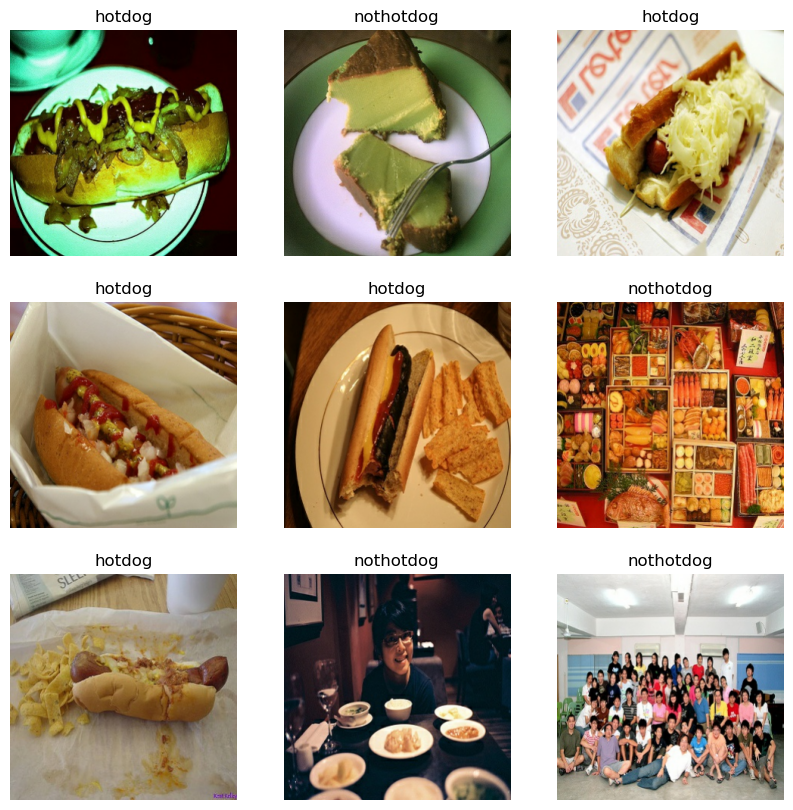

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 300, 300, 3)
(32,)


In [8]:
model = Sequential()

model.add(Rescaling(1.0 / 255, input_shape=(300, 300, 3)))

model.add(Conv2D(16, 3, activation="relu", kernel_regularizer="l1"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.1))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.3))
model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.5))
model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.75))
# Flatten
model.add(Flatten())
model.add(Dense(128, activation="relu"))

# Output layer
model.add(Dense(2, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"]) # binary loss

early_stopping = EarlyStopping(
    patience=3, monitor="val_loss", restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=early_stopping,
)

Epoch 1/20


2024-01-26 21:25:30.947728: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-01-26 21:25:31.462399: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-26 21:25:31.656956: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-26 21:25:32.630333: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f487049e4c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-26 21:25:32.630378: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2024-01-26 21:25:32.640723: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR cra

71/71 [==============================] - 11s 93ms/step - loss: 1.0115 - acc: 0.4978 - val_loss: 0.9061 - val_acc: 0.4973
Epoch 2/20
71/71 [==============================] - 4s 46ms/step - loss: 0.8507 - acc: 0.5120 - val_loss: 0.8023 - val_acc: 0.5320
Epoch 3/20
71/71 [==============================] - 4s 48ms/step - loss: 0.7663 - acc: 0.5471 - val_loss: 0.7435 - val_acc: 0.5907
Epoch 4/20
71/71 [==============================] - 4s 46ms/step - loss: 0.7083 - acc: 0.6307 - val_loss: 0.7064 - val_acc: 0.6413
Epoch 5/20
71/71 [==============================] - 3s 44ms/step - loss: 0.6916 - acc: 0.6400 - val_loss: 0.6882 - val_acc: 0.6520
Epoch 6/20
71/71 [==============================] - 4s 47ms/step - loss: 0.6597 - acc: 0.6751 - val_loss: 0.6989 - val_acc: 0.6267
Epoch 7/20
71/71 [==============================] - 4s 48ms/step - loss: 0.6474 - acc: 0.6769 - val_loss: 0.6743 - val_acc: 0.6560
Epoch 8/20
71/71 [==============================] - 3s 44ms/step - loss: 0.6464 - acc: 0.6809

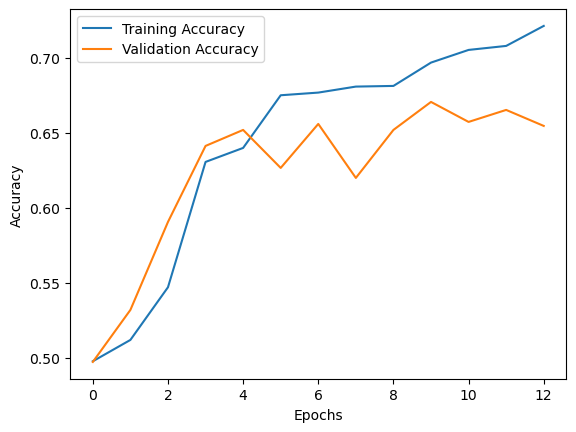

In [9]:
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

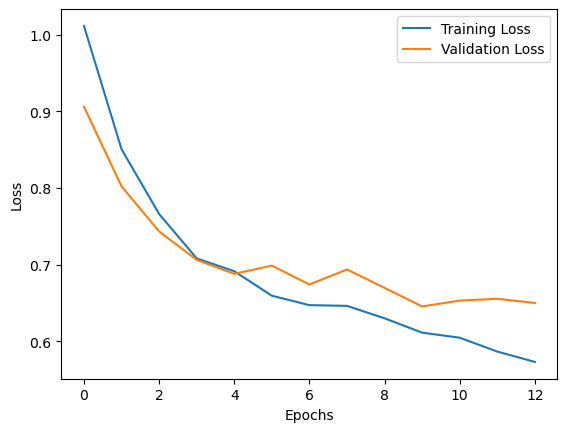

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [10]:
model.save('model.h5')

/home/landry/anacoda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [131]:
model = load_model('model.h5')

In [134]:
img_path = "../data/test/nothotdog/151.jpg"

img = image.load_img(img_path, target_size=(300, 300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

class_labels = ["hotdog", "nothotdog"]
predicted_class = class_labels[np.argmax(predictions)]

1/1 [==============================] - 0s 29ms/step


In [135]:
print(f"Predicted class: {predicted_class}")

Predicted class: nothotdog
